In [15]:
#import libraries
from bs4 import BeautifulSoup
import requests
import string
import re
import matplotlib.pyplot as plt

In [16]:
def DataScrape(url):
    #Connect to website
    page= requests.get(url)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
    
    #Find the title and year of the Special
    title=soup2.find('h1').get_text()
    title= title.strip()
    try:
        year = re.search('\(([^\)]+)\)', title).group(1)
        
    except:
        year = None
    
    location = title.find(':')
    comedian = title[0:location]
    location1 = title.find('(')
    Title = title[location+2:location1]
     
    #Parse the text of the special
    text = soup2.find_all('p')
   
    #Remove the excess html code
    text = re.sub('<[^>]*>', '', str(text))
    
    #Take out linebreaks
    text=text.replace('\n', ' ')
    
    #Remove remaining Whitespace
    text= re.sub(' {2,}', '', text)
    
    #Remove all punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', "'"))
    text = text.translate(str.maketrans('', '', '"'))
    text = text.translate(str.maketrans('', '', '-'))
    
    #Cutoff the ending
    location = text.find('Your email address will not be published')
    
    text = text[0:location-25]
    
    
    #Create Original Dictionary
    wordFrequency = CreateWordFrequency(text)
    
    #Sort Dictionary
    sortedDict = {k: v for k, v in sorted(wordFrequency.items(), key=lambda v: v[1], reverse=True)}
    
    #Get top ten words
    topTen = GetTopTen(sortedDict)
    
    data = [comedian, Title, year, topTen]
    return data

In [17]:
def GetTopTen(sortedDictionary):
    i=0
    topTen ={}
    for k in sortedDictionary:
        if i>9:
            break
        else:
            topTen[k] = sortedDictionary[k]
            i=i+1
    return topTen

In [18]:
def CreateWordFrequency(text):
    wordFrequency = {}
    wordBank = text.split()
    for word in wordBank:
        if word in wordFrequency.keys():
            wordFrequency[word] +=1
        else: 
            wordFrequency[word]=1
    return wordFrequency

In [19]:
data = DataScrape('https://scrapsfromtheloft.com/comedy/norm-macdonald-hitlers-dog-gossip-trickery-2017-full-transcript/')

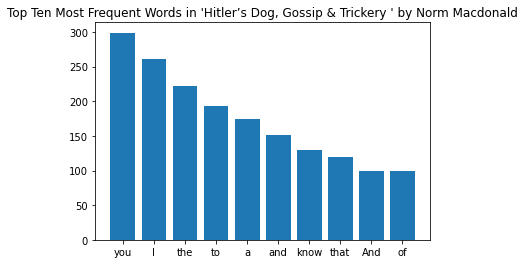

In [24]:
plt.bar(x=data[-1].keys(), height = data[-1].values())
plt.title('Top Ten Most Frequent Words in \'{1}\' by {0}'.format(data[0], data[1]))
plt.show()